In [73]:
# import the libraries

import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [91]:
# loading the data

TSLA = pd.read_csv (r'C:\Users\hezek\Downloads\TSLA.csv')
AAPL = pd.read_csv (r'C:\Users\hezek\Downloads\AAPL.csv')

In [99]:
# showing the data 
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-28,65.508003,68.167999,64.519997,65.542000,65.542000,94351500
1,2019-10-29,63.998001,64.860001,62.950001,63.243999,63.243999,63421500
2,2019-10-30,62.599998,63.757999,61.993999,63.001999,63.001999,48209000
3,2019-10-31,62.619999,63.799999,62.599998,62.984001,62.984001,25335000
4,2019-11-01,63.264000,63.296001,61.959999,62.661999,62.661999,31919500
...,...,...,...,...,...,...,...
246,2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
247,2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
248,2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
249,2020-10-22,441.920013,445.230011,424.510010,425.790009,425.790009,39993200


In [100]:
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-28,61.855000,62.312500,61.680000,62.262501,61.650810,96572800
1,2019-10-29,62.242500,62.437500,60.642502,60.822498,60.224953,142839600
2,2019-10-30,61.189999,61.325001,60.302502,60.814999,60.217525,124522000
3,2019-10-31,61.810001,62.292500,59.314999,62.189999,61.579021,139162000
4,2019-11-01,62.384998,63.982498,62.290001,63.955002,63.326683,151125200
...,...,...,...,...,...,...,...
246,2020-10-19,119.959999,120.419998,115.660004,115.980003,115.980003,120639300
247,2020-10-20,116.199997,118.980003,115.629997,117.510002,117.510002,124423700
248,2020-10-21,116.669998,118.709999,116.449997,116.870003,116.870003,89946000
249,2020-10-22,117.449997,118.040001,114.589996,115.750000,115.750000,101988000


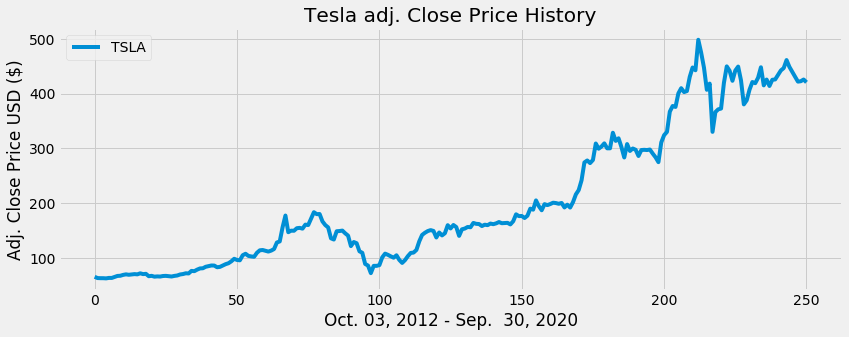

In [101]:

# visualizing the data
plt.figure(figsize =(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.title('Tesla adj. Close Price History')
plt.xlabel('Oct. 03, 2012 - Sep.  30, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [102]:
# simple moving average 

SMA30 = pd.DataFrame()
SMA30['Adj Close'] = TSLA['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
246,419.780667
247,422.838334
248,424.717001
249,426.532002


In [79]:
# simple moving avg for 100 days
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = TSLA['Adj Close'].rolling(window =100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
246,327.336198
247,329.885598
248,332.315799
249,334.810579


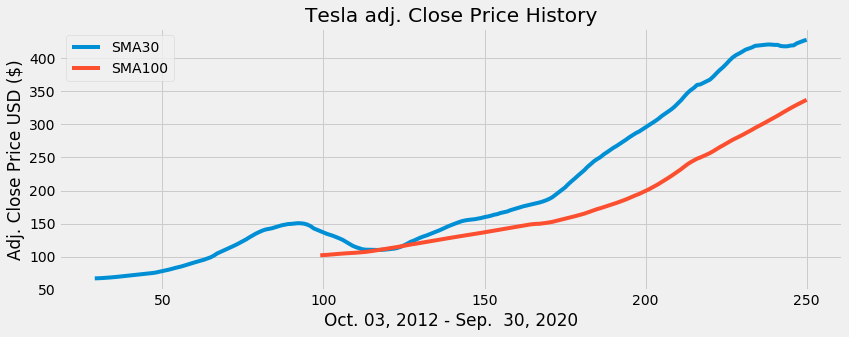

In [103]:
# visualizing the data
plt.figure(figsize =(12.5, 4.5))
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Tesla adj. Close Price History')
plt.xlabel('Oct. 03, 2012 - Sep.  30, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [104]:
# new data frame is created to store all the data
data = pd.DataFrame()
data ['TSLA'] = TSLA['Adj Close']
data ['SMA30'] = SMA30['Adj Close']
data ['SMA100'] = SMA100['Adj Close']
data

,TSLA,SMA30,SMA100
0,65.542000,NaN,NaN
1,63.243999,NaN,NaN
2,63.001999,NaN,NaN
3,62.984001,NaN,NaN
4,62.661999,NaN,NaN
...,...,...,...
246,430.829987,419.780667,327.336198
247,421.940002,422.838334,329.885598
248,422.640015,424.717001,332.315799
249,425.790009,426.532002,334.810579


In [97]:
# buy sell stock signal 

def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell =[]
    flag = -1 
    
    for i in range(len (data)):
        if data['SMA30'][i] > data ['SMA100'][i]:
            if flag == 1:
                sigPriceBuy.append(data['TSLA'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data ['SMA30'][i] < data['SMA100'][i]:
            if flag  == 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['TSLA'][i])
            
            
        else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        
        return (sigPriceBuy, sigPriceSell)

In [98]:
#Create a new dataframe
signal = pd.DataFrame(index=df['TSLA'].index)
signal['TSLA']=df['TSLA']
signal['SMA30'] = SMA30['TSLA']
signal['SMA100'] = SMA100['TSLA']

KeyError: 'TSLA'

In [88]:
# store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['buy_Signal_Price'] = buy_sell[0]
data['Bell_Signal_Price'] = buy_sell[1]

ValueError: Length of values does not match length of index